# <font color='Purple' face='cursive'><center> Sentiment Analysis </center></font>

In [3]:
# Import Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
# Read Data sets into the notebook
trump_df = pd.read_csv(r"/content/hashtag_donaldtrump.csv",lineterminator='\n')

biden_df = pd.read_csv(r"/content/hashtag_joebiden.csv",lineterminator='\n')

In [5]:
# Check shape of both data frames

print(trump_df.shape)

print(biden_df.shape)

(143231, 21)
(154353, 21)


In [6]:
# Check Info of both data sets 
print(trump_df.info())

print(biden_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143231 entries, 0 to 143230
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            143231 non-null  object 
 1   tweet_id              143231 non-null  float64
 2   tweet                 143231 non-null  object 
 3   likes                 143231 non-null  float64
 4   retweet_count         143231 non-null  float64
 5   source                142849 non-null  object 
 6   user_id               143231 non-null  float64
 7   user_name             143225 non-null  object 
 8   user_screen_name      143231 non-null  object 
 9   user_description      128579 non-null  object 
 10  user_join_date        143231 non-null  object 
 11  user_followers_count  143231 non-null  float64
 12  user_location         99389 non-null   object 
 13  lat                   73769 non-null   float64
 14  long                  73769 non-null   float64
 15  

Lets concat both dataframes for easier Analysis using [pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [7]:
# Adding a new column to differentiate between tweets of Biden and Trump
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"

In [8]:
# Concat the data frames
Data_Mixed = pd.concat([trump_df,biden_df])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP


Lets check the number of tweets received for each of them using [barplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

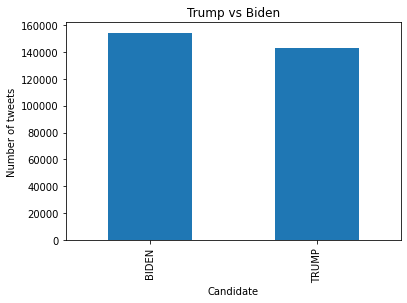

In [9]:
# Plot the number of tweets for each candidate
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show()

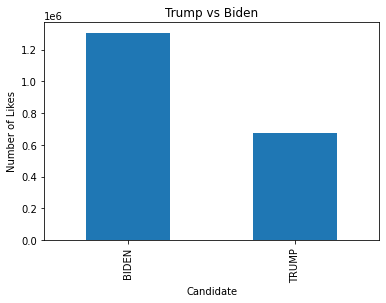

In [10]:
# Comparison of likes
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.show()

 - Even though The number of tweets for Trump are high but the number of likes are high for BIDEN showing that there are was more talk about biden than trump

In [11]:
Data_Mixed.country.value_counts()

United States of America    86393
United States               15712
United Kingdom               6809
Canada                       5975
France                       4657
                            ...  
Anguilla                        1
Isle of Man                     1
Vanuatu                         1
Republic of the Congo           1
Tonga                           1
Name: country, Length: 170, dtype: int64

United States and United States of America are Same so using same literal US for both of them using [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [12]:
Data_Mixed['country']=Data_Mixed['country'].replace({"United States of America" : "US", "United States" : "US"})

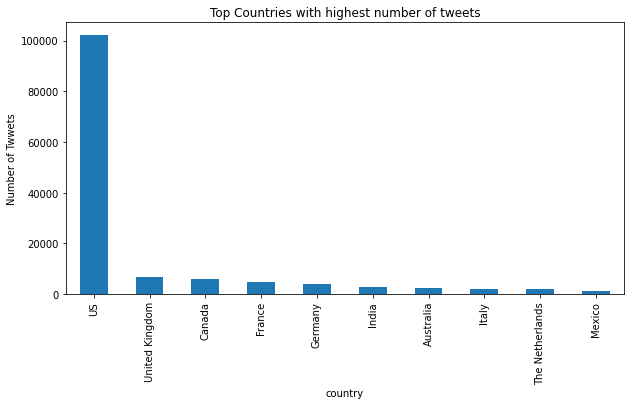

In [13]:
# Countries with highest number of tweets
plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show()

 - As Expected more Tweets are from US, as elections are being conducted there

In [14]:
# List of top 10 countries with highest number of tweets
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10Countries

['US',
 'United Kingdom',
 'Canada',
 'France',
 'Germany',
 'India',
 'Australia',
 'Italy',
 'The Netherlands',
 'Mexico']

In [15]:
# Twwets for Biden and Trump from each country
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()

tweet_df = tweet_df[tweet_df['country'].isin(top10Countries)]

tweet_df

,country,Candidate,tweet
14,Australia,BIDEN,1129
15,Australia,TRUMP,1311
45,Canada,BIDEN,2832
46,Canada,TRUMP,3143
92,France,BIDEN,2021
93,France,TRUMP,2636
98,Germany,BIDEN,1515
99,Germany,TRUMP,2500
123,India,BIDEN,1308
124,India,TRUMP,1577


 Lets check the comparison of tweets for Biden and Trumo for the top countries using [barplot](http://seaborn.pydata.org/generated/seaborn.barplot.html)

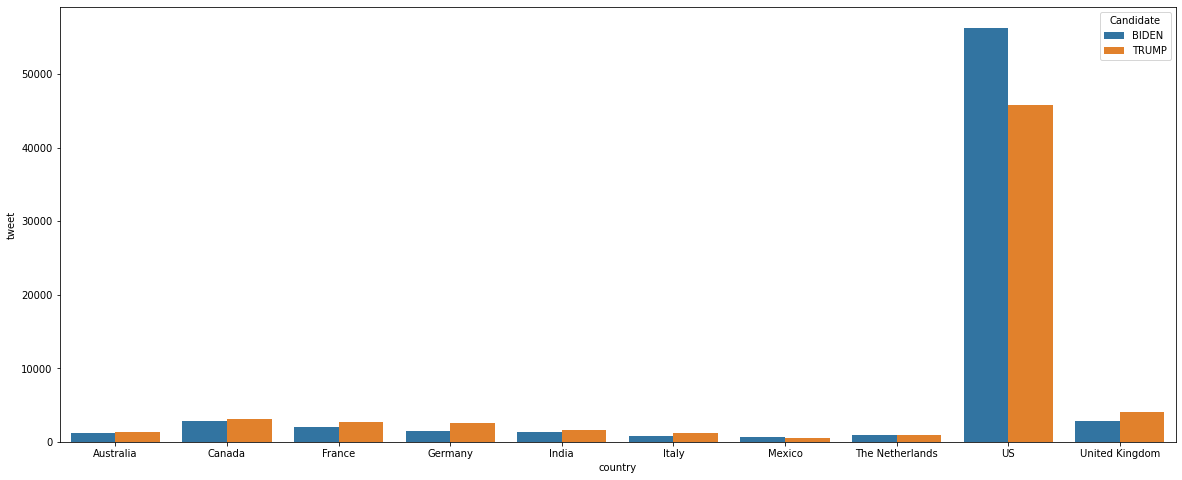

In [16]:
#Plot top 10 countries with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='Candidate')
plt.show()

 - Except in India Most of the countries tweets more about Trump

Lets drill down and check tweets in states and on whom most tweets are based on

In [17]:
# List of top 10 states with highest number of tweets
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10States

['California',
 'New York',
 'Florida',
 'Texas',
 'England',
 'District of Columbia',
 'Pennsylvania',
 'Illinois',
 'Ile-de-France',
 'Ontario']

In [18]:
# Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df

,state,Candidate,tweet
165,California,BIDEN,7555
166,California,TRUMP,7344
276,District of Columbia,BIDEN,1895
277,District of Columbia,TRUMP,1917
304,England,BIDEN,2019
305,England,TRUMP,2672
322,Florida,BIDEN,4602
323,Florida,TRUMP,3601
410,Ile-de-France,BIDEN,1277
411,Ile-de-France,TRUMP,1490


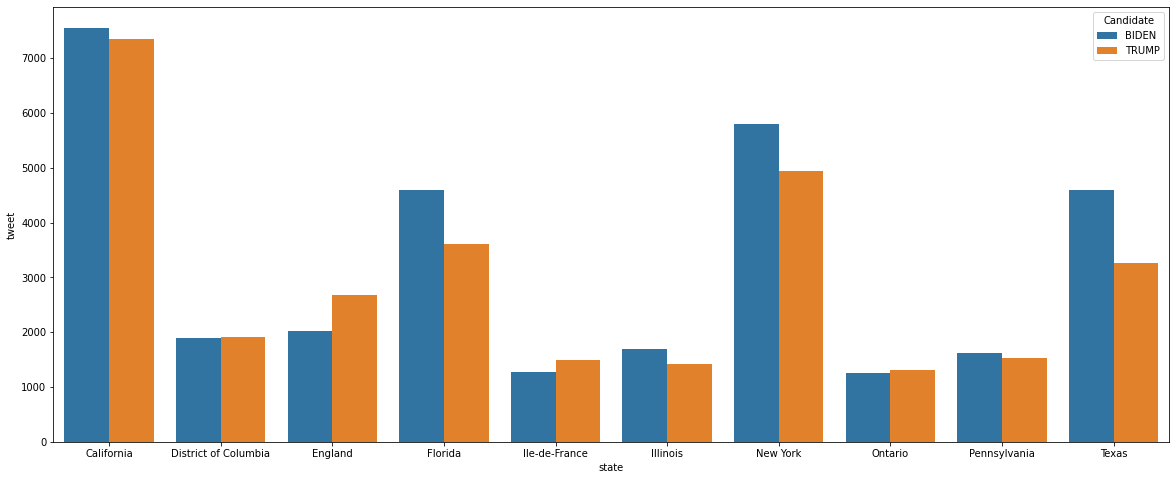

In [19]:
#Plot top 10 states with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

 - Even here the tweets are more for trump than Biden

## Sentiment Analysis of Presidential Elections

We will be considering sentiments of only US people here as they are the major factor that decide the president of United States

In [20]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [21]:
# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

## DonaldTrump tweets sentiment analysis

In [22]:
Trump_Tweets = Data_Mixed.query('(Candidate == "TRUMP")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'US']

Trump_Tweets.reset_index(inplace = True, drop = True)

Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)


Trump_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",US,president donald trump s youngest daughter ti...,0.000000,0.000000,neutral
1,#DonaldTrump failed to denounce the far-right ...,US,donaldtrump failed to denounce the far right c...,0.611905,-0.038095,negative
2,🔴 Abogados denuncian que siguen sin ubicar a l...,US,abogados denuncian que siguen sin ubicar a l...,0.000000,0.000000,neutral
3,"LIVE: President Donald Trump in Erie, PA #Penn...",US,live president donald trump in erie pa penns...,0.500000,0.136364,positive
4,"#ThomTillis, laggard &amp; layabout, is tied w...",US,thomtillis laggard amp layabout is tied w ...,0.571429,-0.102857,negative


In [23]:
Trump_Tweets.analysis.value_counts(normalize=True)*100

neutral     38.658265
positive    37.561156
negative    23.780578
Name: analysis, dtype: float64

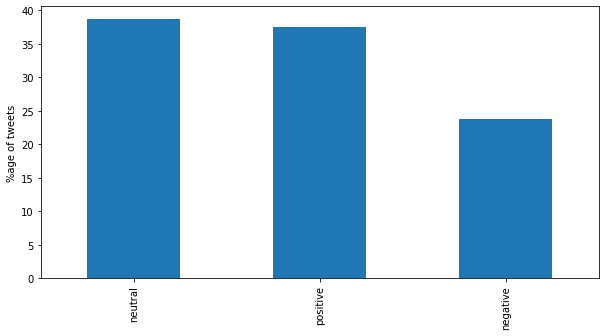

In [24]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Trump_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

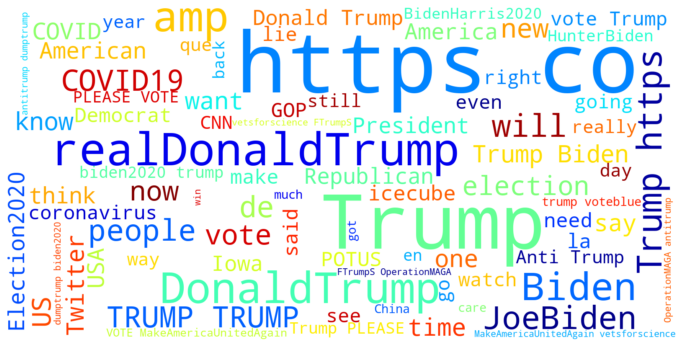

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords11 = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords11,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(trump_df['tweet'][:5000])

## JoeBiden tweets sentiment analysis

In [26]:
Biden_Tweets = Data_Mixed.query('(Candidate == "BIDEN")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Biden_Tweets = Biden_Tweets.dropna().loc[Biden_Tweets.country == 'US']


Biden_Tweets.reset_index(inplace = True, drop = True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

 
Biden_Tweets['subjectivity']= Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity']    = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis']    = Biden_Tweets['polarity'].apply(getAnalysis)
Biden_Tweets.head()


Biden_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,Final Debate: #Trump and #Biden go after each ...,US,final debate trump and biden go after each ot...,0.687500,-0.062500,negative
1,🇺🇸#Trump o #Biden: ¿Quién ganará el voto latin...,US,trump o biden quién ganará el voto latino ...,0.000000,0.000000,neutral
2,"Whatever you do, DON’T BELIEVE THE POLLS. Vot...",US,whatever you do don t believe the polls vot...,0.288889,-0.155556,negative
3,POLL: Trump's Approval Hits 52% https://t.co/0...,US,poll trump s approval hits donaldtrump j...,0.000000,0.000000,neutral
4,"""Burisma Executive Emailed Hunter #Biden about...",US,burisma executive emailed hunter biden about ...,0.500000,0.500000,positive


In [27]:
Biden_Tweets.analysis.value_counts(normalize=True)*100

neutral     44.006099
positive    37.526205
negative    18.467696
Name: analysis, dtype: float64

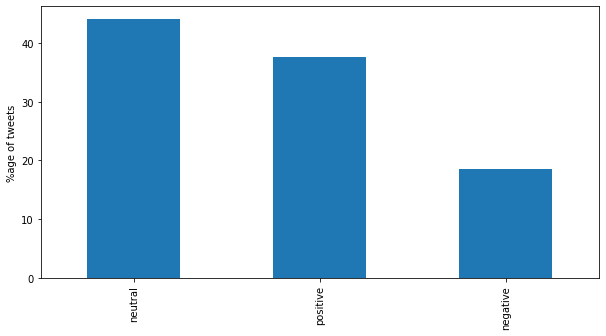

In [28]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Biden_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

Just Comparing the positive and negative tweets itself shows that Biden was favourite for winning presidential elections

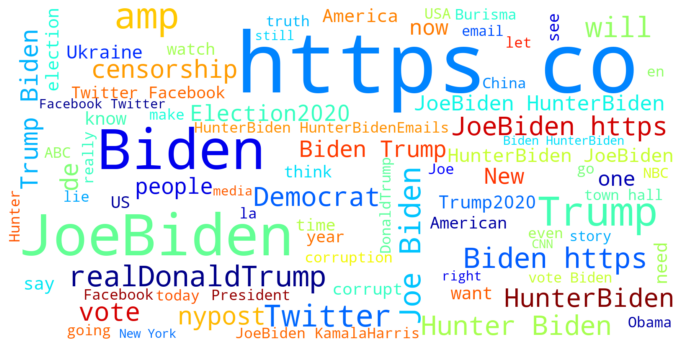

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(biden_df['tweet'][0:5000])

According to Sentiment Analysis, Biden has upper hand over Trump in US which actually matters in presidential elections